Imports

In [11]:
import pandas as pd

Access files from this path: "C:\Users\Daniel Price\Documents\Documents\Exeter\Data_Science_in_Economics\Empirical_Project\Data"

for each file, from 2000-01 to 2021-22 (inclusive), do the following:
Convert the csv file to a pandas dataframe
Since each year is the same data, but for a different year, we can concatenate the dataframes together.

In [12]:
import os
import pandas as pd
import re

# Function to parse dates adaptively
def parse_dates(dates):
    # Checking the year format based on length and adjusting accordingly
    if len(dates[0].split('/')[-1]) == 2:
        return pd.to_datetime(dates, format='%d/%m/%y')
    elif len(dates[0].split('/')[-1]) == 4:
        return pd.to_datetime(dates, format='%d/%m/%Y')
    else:
        # Fallback to infer the format if unexpected length
        return pd.to_datetime(dates, infer_datetime_format=True)

# Data directory. 
# 
# ****************************************************************IMPORTANT*****************************************************************
#
# PLEASE CHANGE THIS TO THE PATH OF THE DATA DIRECTORY ON YOUR MACHINE
#
data = r"C:\Users\Daniel Price\Documents\GitHub\Effects-of-VAR-on-English-FootballFootball\Data"
#
#*******************************************************************************************************************************************

# CATE values file for later use
CATE_values = "Causal_Forest_Outputs.txt"
CATE_values_path = os.path.join(data, CATE_values)

# Get the list of files in the data directory
file_list = os.listdir(data)

# Initialize an empty dataframe to store the concatenated data
concatenated_df = pd.DataFrame()

# Define the pattern for the file names
pattern = re.compile(r'^\d{4}-\d{2}\.csv$')

# Initialize a counter for the number of files converted
file_count = 0

# Iterate over each file
for file_name in file_list:
    # Check if the file matches the pattern for a CSV file
    if pattern.match(file_name):
        # Construct the file path
        file_path = os.path.join(data, file_name)
        
        # Read the CSV file into a dataframe, explicitly parsing the date
        df = pd.read_csv(file_path, parse_dates=['Date'], date_parser=parse_dates)
        
        # Concatenate the dataframe to the existing data
        concatenated_df = pd.concat([concatenated_df, df])

        # Increment the counter
        file_count += 1

# Print the concatenated dataframe
print(concatenated_df)

# Print the number of files converted
print(f"Number of files converted: {file_count}")


The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
The argument 'date_parser' is deprecated and will be removed in a future version

    Div       Date     HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
0    E0 2000-08-19     Charlton        Man City     4     0   H     2     0   
1    E0 2000-08-19      Chelsea        West Ham     4     2   H     1     0   
2    E0 2000-08-19     Coventry   Middlesbrough     1     3   A     1     1   
3    E0 2000-08-19        Derby     Southampton     2     2   D     1     2   
4    E0 2000-08-19        Leeds         Everton     2     0   H     2     0   
..   ..        ...          ...             ...   ...   ...  ..   ...   ...   
318  E0 2024-04-13  Bournemouth      Man United     2     2   D     2     1   
319  E0 2024-04-14    Liverpool  Crystal Palace     0     1   A     0     1   
320  E0 2024-04-14     West Ham          Fulham     0     2   A     0     1   
321  E0 2024-04-14      Arsenal     Aston Villa     0     2   A     0     0   
322  E0 2024-04-15      Chelsea         Everton     6     0   H     4     0   

    HTR  ...  AvgC<2.5  AHCh  B365CAHH  B365CAHA  P

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.


VAR was implemented after in the 2019/20 season, so we will mark the data which had VAR with a 1, and the data which did not have VAR with a 0. We will make a new column called 'VAR' which will have this information.

In [13]:
# Convert 'Date' column to datetime format, handling unparseable dates by setting them as NaT
concatenated_df['Date'] = pd.to_datetime(concatenated_df['Date'], format='%d/%m/%Y', errors='coerce')

# Identify rows where the date conversion resulted in NaT
nat_dates = concatenated_df[concatenated_df['Date'].isna()]

# Print the count of NaT entries
print(f"Number of unparseable dates set as NaT: {nat_dates.shape[0]}")

# If there are any NaT values, print them out
if not nat_dates.empty:
    print("List of unparseable dates:")
    print(nat_dates['Date'])  # This will only show NaT, for actual date strings causing issues, you should print another column if available

# Define the date for VAR implementation
var_start_date = pd.Timestamp('2019-06-01')

# Add a 'VAR' column based on the year extracted from the 'date'. VAR implemented from 2019 onwards.
concatenated_df['VAR'] = concatenated_df['Date'].apply(lambda x: 1 if x >= var_start_date else 0)

# Print the concatenated dataframe with the new 'VAR' column
print(concatenated_df)

# Print the number of matches listed as having VAR
print(f"Number of matches listed as having VAR: {concatenated_df['VAR'].sum()}")

# Write the concatenated dataframe to a CSV file in the same directory as the datasets
data_path = r"C:\Users\Daniel Price\Documents\GitHub\Effects-of-VAR-on-English-FootballFootball\Data"
concatenated_df.to_csv(os.path.join(data, 'combined_data.csv'), index=False)

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Number of unparseable dates set as NaT: 0
    Div       Date     HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
0    E0 2000-08-19     Charlton        Man City     4     0   H     2     0   
1    E0 2000-08-19      Chelsea        West Ham     4     2   H     1     0   
2    E0 2000-08-19     Coventry   Middlesbrough     1     3   A     1     1   
3    E0 2000-08-19        Derby     Southampton     2     2   D     1     2   
4    E0 2000-08-19        Leeds         Everton     2     0   H     2     0   
..   ..        ...          ...             ...   ...   ...  ..   ...   ...   
318  E0 2024-04-13  Bournemouth      Man United     2     2   D     2     1   
319  E0 2024-04-14    Liverpool  Crystal Palace     0     1   A     0     1   
320  E0 2024-04-14     West Ham          Fulham     0     2   A     0     1   
321  E0 2024-04-14      Arsenal     Aston Villa     0     2   A     0     0   
322  E0 2024-04-15      Chelsea         Everton     6     0   H     4     0   

    HTR  

Check for columns with missing data

In [14]:
# Check for columns without NaN values
no_nan_columns = concatenated_df.columns[concatenated_df.notna().all()].tolist()

print("Columns without NaN values:", no_nan_columns)

Columns without NaN values: ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR', 'VAR']


How have fouls been afected?

       Season  Total_Home_Fouls  Total_Away_Fouls  Total_Home_Yellows  \
0   2000/2001              4932              5299                 512   
1   2001/2002              4891              5221                 479   
2   2002/2003              4791              4875                 500   
3   2003/2004              4742              5051                 481   
4   2004/2005              4730              5186                 421   
5   2005/2006              4938              5060                 499   
6   2006/2007              4686              4834                 530   
7   2007/2008              4570              4696                 511   
8   2008/2009              4300              4525                 515   
9   2009/2010              4423              4771                 526   
10  2010/2011              4175              4343                 537   
11  2011/2012              3830              3908                 523   
12  2012/2013              3895              4058  

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


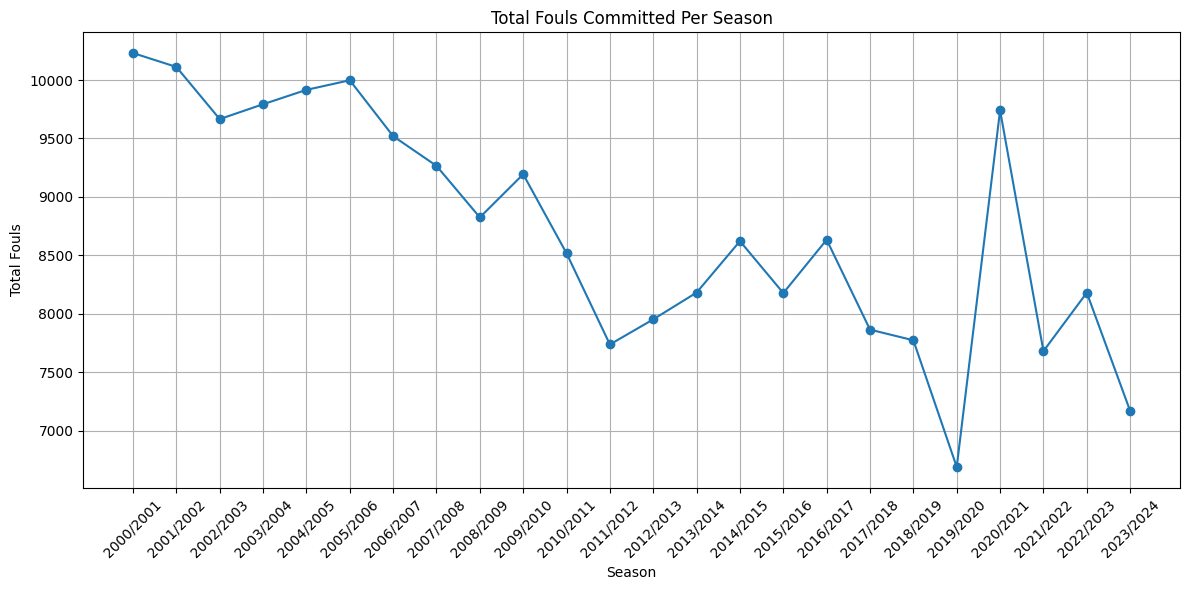

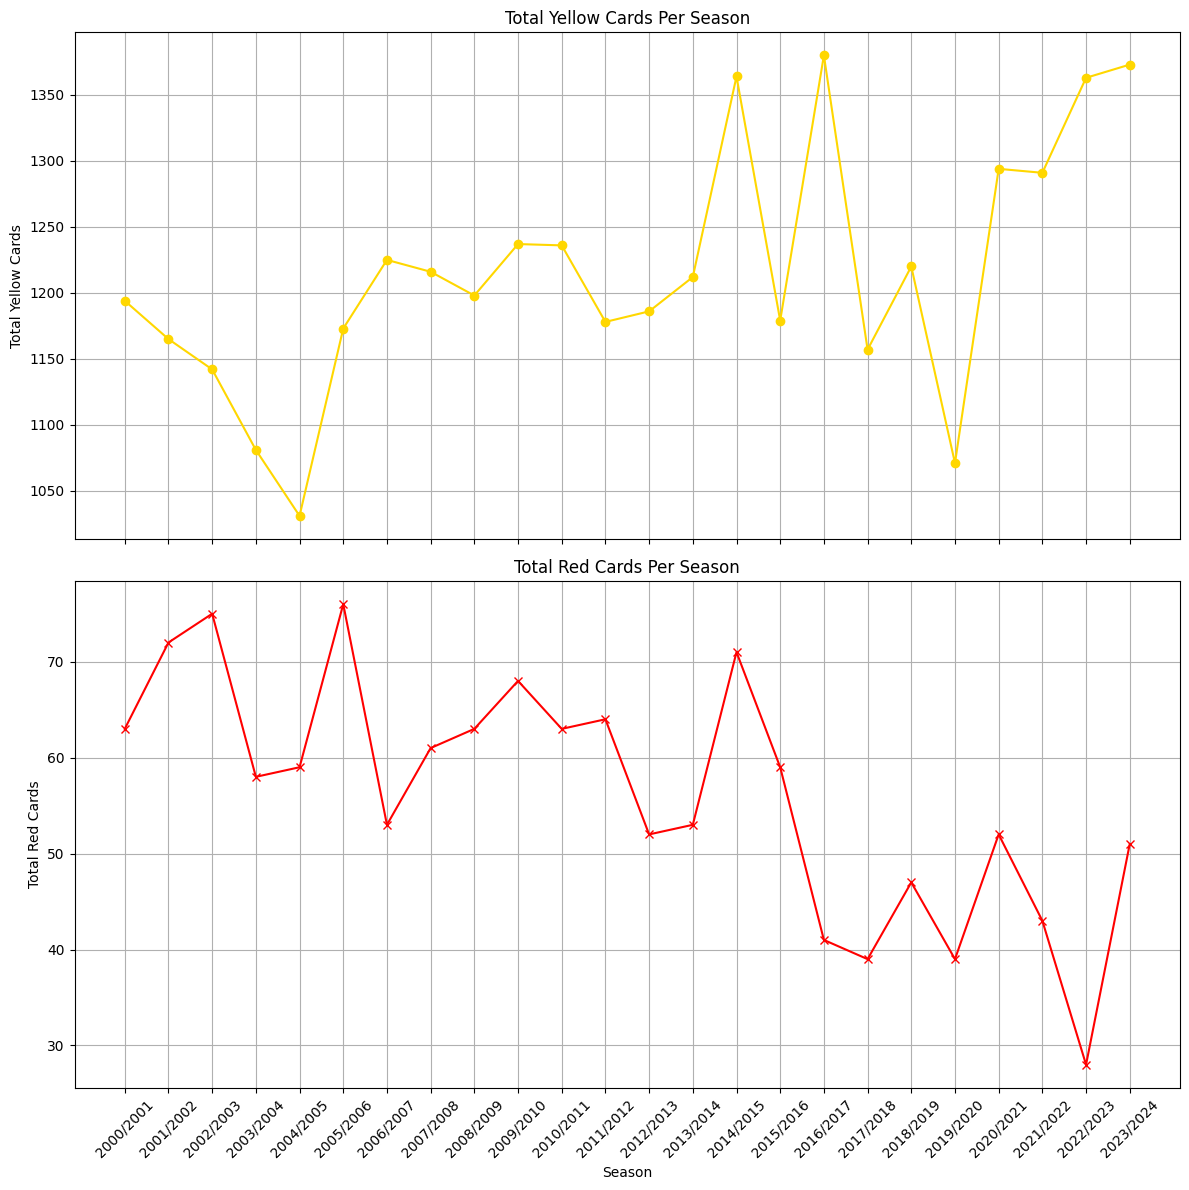

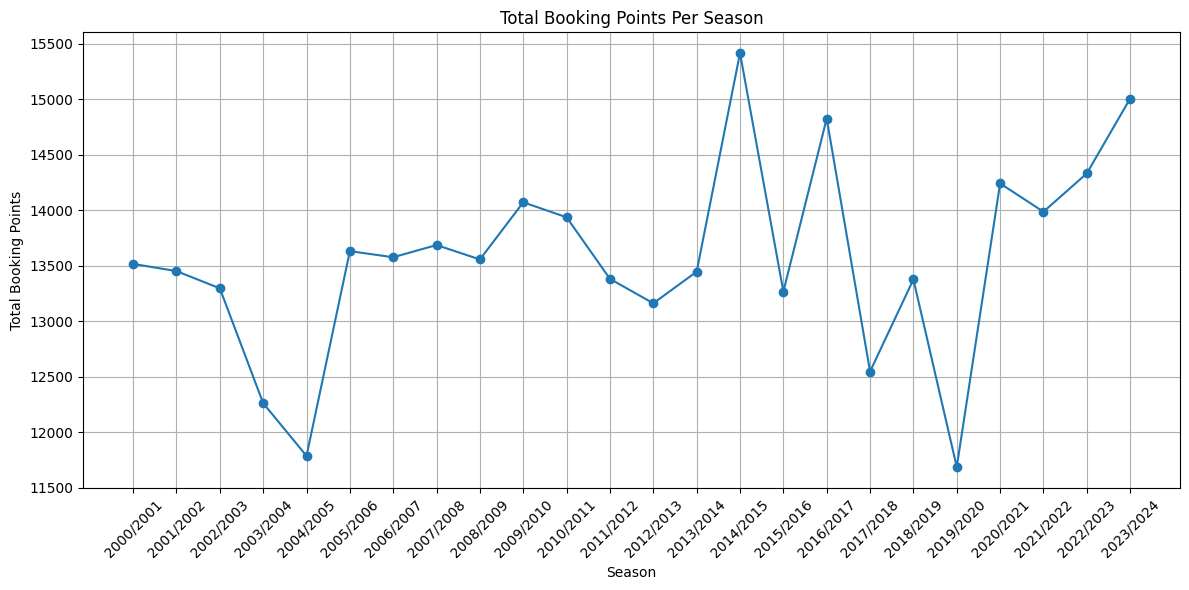

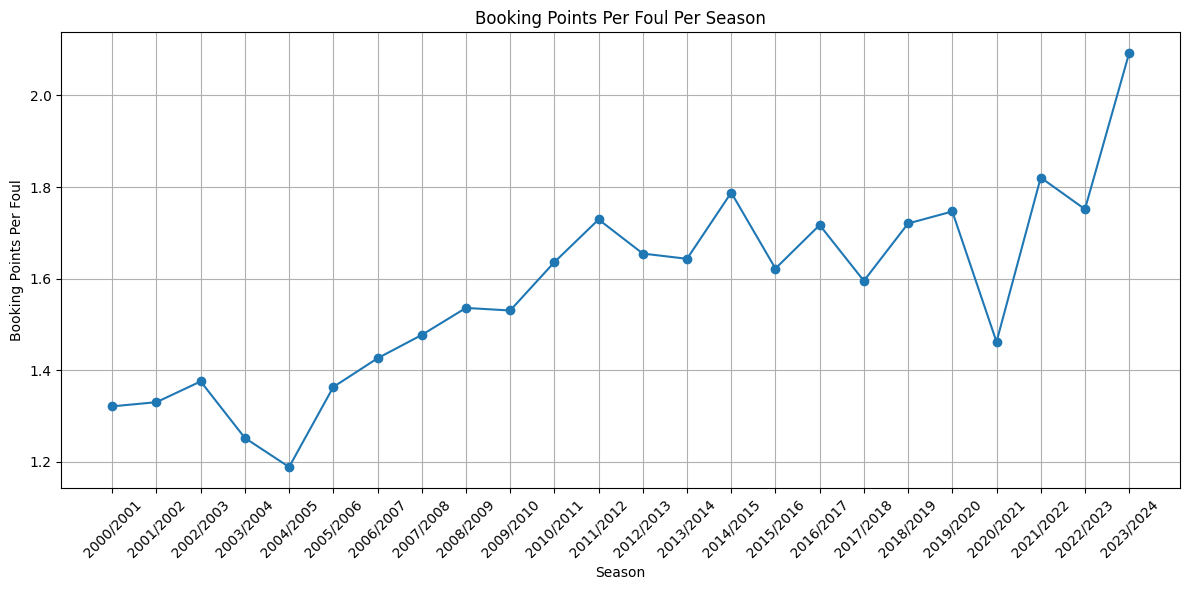

{"Season":"2000\/2001","Total_Home_Fouls":4932,"Total_Away_Fouls":5299,"Total_Home_Yellows":512,"Total_Away_Yellows":682,"Total_Home_Reds":32,"Total_Away_Reds":31,"Total_Home_BookingPoints":5920,"Total_Away_BookingPoints":7595,"Total_Fouls":10231,"Total_Yellows":1194,"Total_Reds":63,"Total_BookingPoints":13515,"BookingPoints_Per_Foul":1.3209852409}
{"Season":"2001\/2002","Total_Home_Fouls":4891,"Total_Away_Fouls":5221,"Total_Home_Yellows":479,"Total_Away_Yellows":686,"Total_Home_Reds":32,"Total_Away_Reds":40,"Total_Home_BookingPoints":5590,"Total_Away_BookingPoints":7860,"Total_Fouls":10112,"Total_Yellows":1165,"Total_Reds":72,"Total_BookingPoints":13450,"BookingPoints_Per_Foul":1.3301028481}
{"Season":"2002\/2003","Total_Home_Fouls":4791,"Total_Away_Fouls":4875,"Total_Home_Yellows":500,"Total_Away_Yellows":642,"Total_Home_Reds":27,"Total_Away_Reds":48,"Total_Home_BookingPoints":5675,"Total_Away_BookingPoints":7620,"Total_Fouls":9666,"Total_Yellows":1142,"Total_Reds":75,"Total_BookingP

In [15]:
import matplotlib.pyplot as plt

# Plot a graph of fouls committed per season

# Function to determine the season based on the date
def get_season(date):
    if date.month > 6:
        return f"{date.year}/{date.year + 1}"
    else:
        return f"{date.year - 1}/{date.year}"
    
# Add a 'Season' column based on the date
concatenated_df['Season'] = concatenated_df['Date'].apply(get_season)

# Calculate the booking points before grouping
concatenated_df['Home_BookingPoints'] = concatenated_df['HY'] * 10 + concatenated_df['HR'] * 25
concatenated_df['Away_BookingPoints'] = concatenated_df['AY'] * 10 + concatenated_df['AR'] * 25

# Group the data by season and sum the fouls committed
concatenated_df_grouped = concatenated_df.groupby('Season').agg(
    Total_Home_Fouls=('HF', 'sum'),
    Total_Away_Fouls=('AF', 'sum'),
    Total_Home_Yellows=('HY', 'sum'),
    Total_Away_Yellows=('AY', 'sum'),
    Total_Home_Reds=('HR', 'sum'),
    Total_Away_Reds=('AR', 'sum'),
    
    # Sum the booking points
    Total_Home_BookingPoints=('Home_BookingPoints', 'sum'),
    Total_Away_BookingPoints=('Away_BookingPoints', 'sum')
)

# Calculate the total fouls by adding the home and away fouls
concatenated_df_grouped['Total_Fouls'] = concatenated_df_grouped['Total_Home_Fouls'] + concatenated_df_grouped['Total_Away_Fouls']
concatenated_df_grouped['Total_Yellows'] = concatenated_df_grouped['Total_Home_Yellows'] + concatenated_df_grouped['Total_Away_Yellows']
concatenated_df_grouped['Total_Reds'] = concatenated_df_grouped['Total_Home_Reds'] + concatenated_df_grouped['Total_Away_Reds']
concatenated_df_grouped['Total_BookingPoints'] = concatenated_df_grouped['Total_Home_BookingPoints'] + concatenated_df_grouped['Total_Away_BookingPoints']

# Calculate booking points per foul
concatenated_df_grouped['BookingPoints_Per_Foul'] = concatenated_df_grouped['Total_BookingPoints'] / concatenated_df_grouped['Total_Fouls']

# Reset index to make 'Season' a column again if necessary
concatenated_df_grouped.reset_index(inplace=True)

# Display the result
print(concatenated_df_grouped)

# Mean yellow cards per season
mean_yellow_cards = concatenated_df_grouped['Total_Yellows'].mean()
print(f"Mean yellow cards per season: {mean_yellow_cards:.2f}")

# Mean red cards per season
mean_red_cards = concatenated_df_grouped['Total_Reds'].mean()
print(f"Mean red cards per season: {mean_red_cards:.2f}")


# Plotting the fouls committed per season
plt.figure(figsize=(12, 6))
plt.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['Total_Fouls'], marker='o')
plt.title('Total Fouls Committed Per Season')
plt.xlabel('Season')
plt.ylabel('Total Fouls')
plt.xticks(rotation=45)  # Rotate season labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

# Create a figure with two subplots (vertically stacked) with a shared x-axis
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 12), sharex=True)

# Plot for yellow cards on the first subplot
ax1.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['Total_Yellows'], marker='o', color='gold')
ax1.set_title('Total Yellow Cards Per Season')
ax1.set_ylabel('Total Yellow Cards')
ax1.grid(True)

# Plot for red cards on the second subplot
ax2.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['Total_Reds'], marker='x', color='red')
ax2.set_title('Total Red Cards Per Season')
ax2.set_ylabel('Total Red Cards')
ax2.set_xlabel('Season')
ax2.grid(True)

# Improve spacing and show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the booking points per season
plt.figure(figsize=(12, 6))
plt.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['Total_BookingPoints'], marker='o')
plt.title('Total Booking Points Per Season')
plt.xlabel('Season')
plt.ylabel('Total Booking Points')
plt.xticks(rotation=45)  # Rotate season labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

# Plotting the booking points per foul per season
plt.figure(figsize=(12, 6))
plt.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['BookingPoints_Per_Foul'], marker='o')
plt.title('Booking Points Per Foul Per Season')
plt.xlabel('Season')
plt.ylabel('Booking Points Per Foul')
plt.xticks(rotation=45)  # Rotate season labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

# Trying to export total fouls per season to json for use in the web app
concatenated_df_grouped.to_json(os.path.join(data, 'total_fouls_per_season.json'), orient='records', lines=True)

# Print json file
print(concatenated_df_grouped.to_json(orient='records', lines=True))



Plotting this information for Big 6 against non-Big 6 teams, Since VAR was implemented in the 2018/19 season in only cup matches, and thus I am seeing if there is a difference in Goals commited by Big 6 teams and non-Big 6 teams in the league matches.

Goals scored

       Season  Total_Home_Goals  Total_Away_Goals  Total_HalfTime_Home_Goals  \
0   2000/2001               587               405                        261   
1   2001/2002               557               444                        257   
2   2002/2003               570               430                        253   
3   2003/2004               572               440                        262   
4   2004/2005               570               405                        253   
5   2005/2006               555               389                        272   
6   2006/2007               552               379                        258   
7   2007/2008               581               421                        244   
8   2008/2009               532               410                        233   
9   2009/2010               645               408                        283   
10  2010/2011               617               446                        276   
11  2011/2012               604         

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


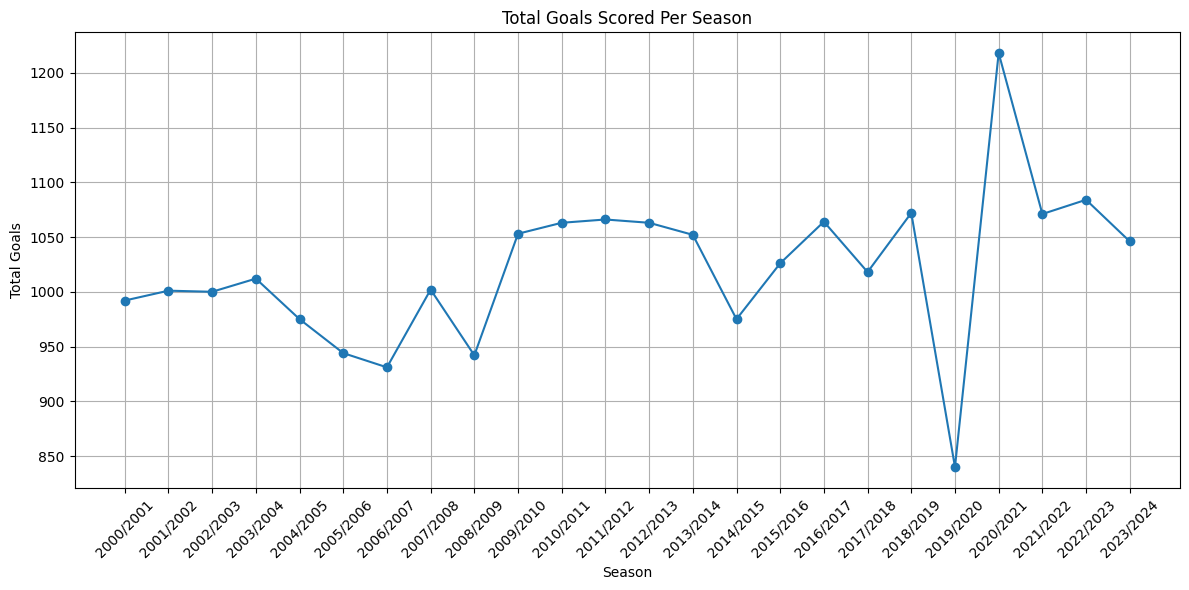

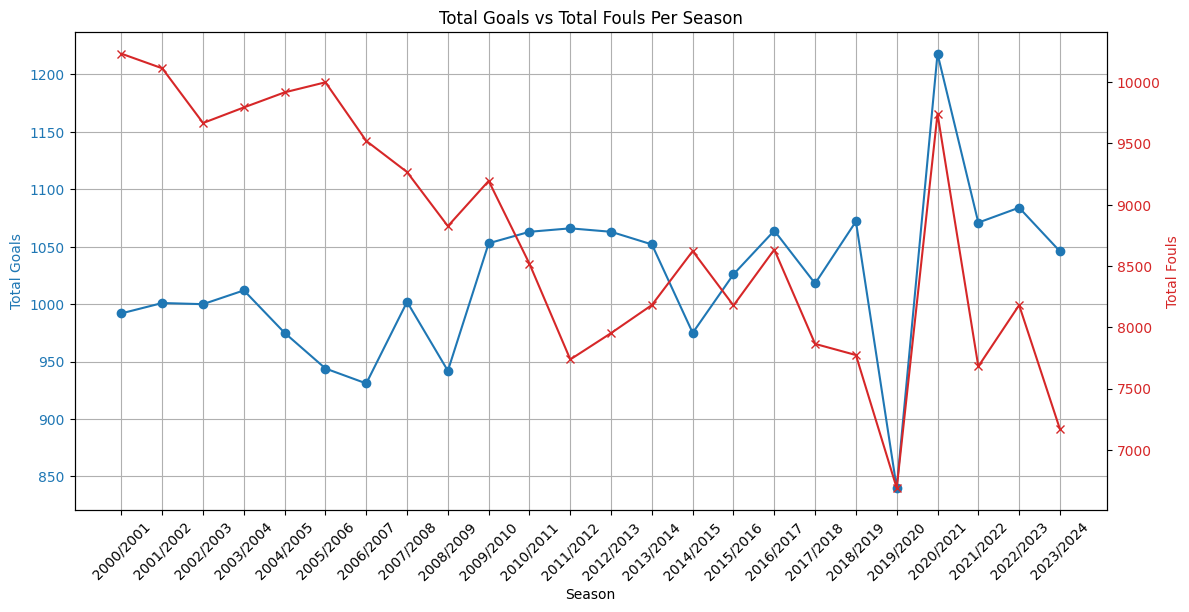

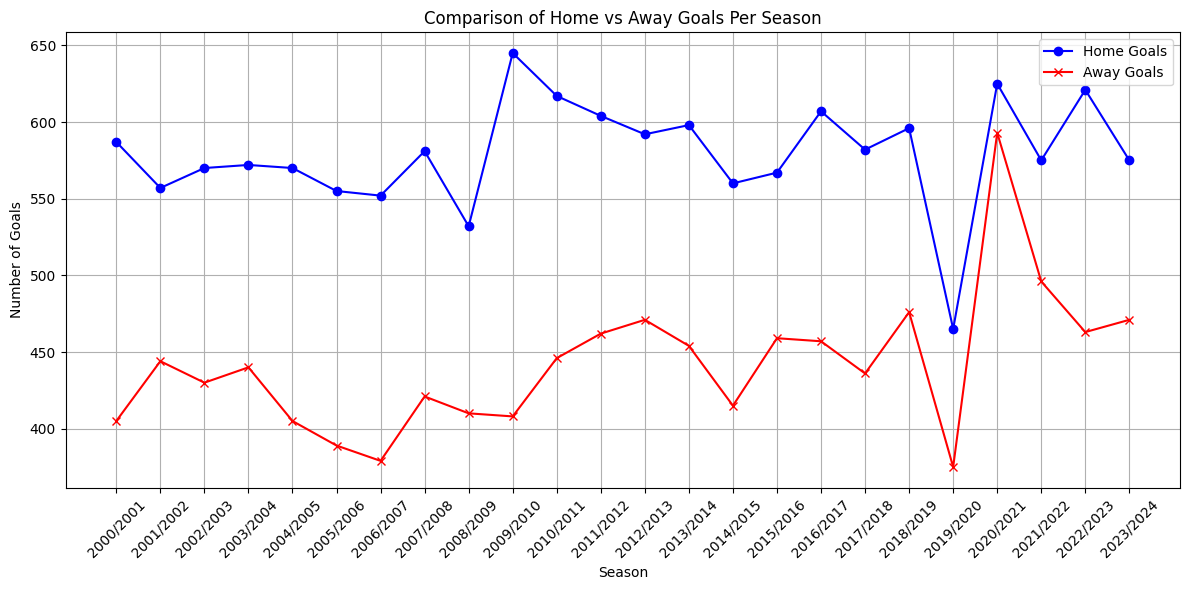

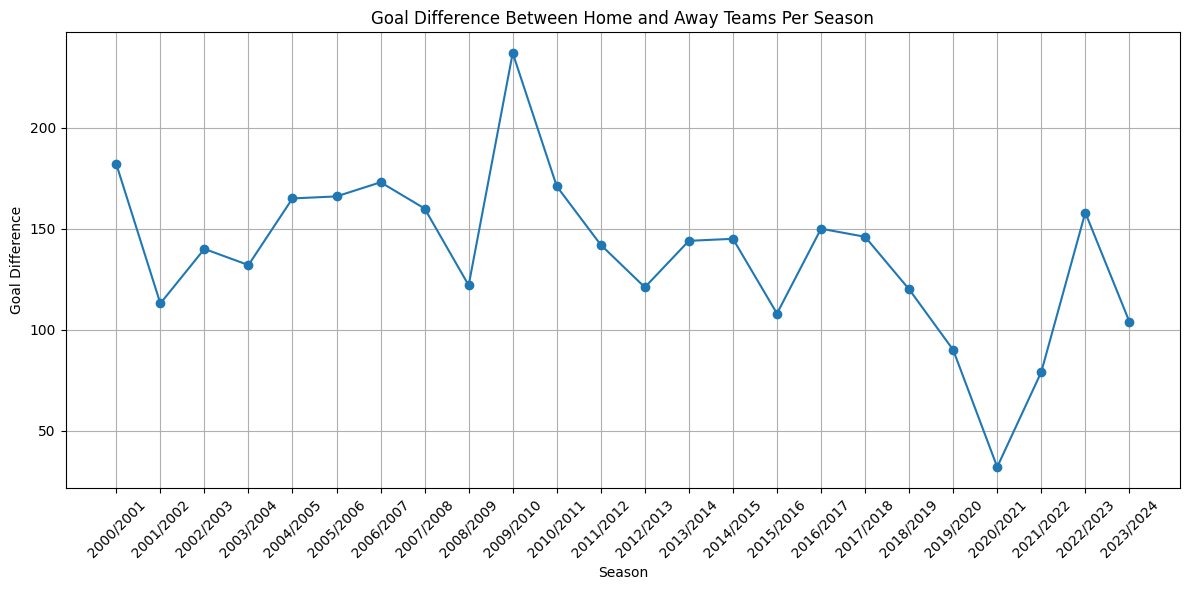

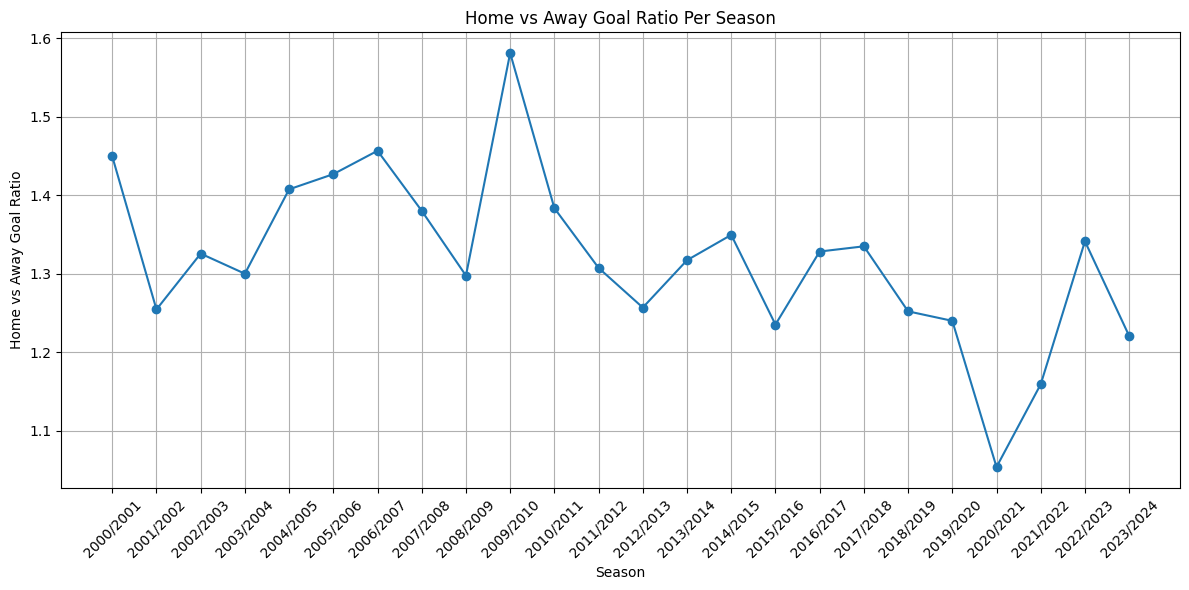

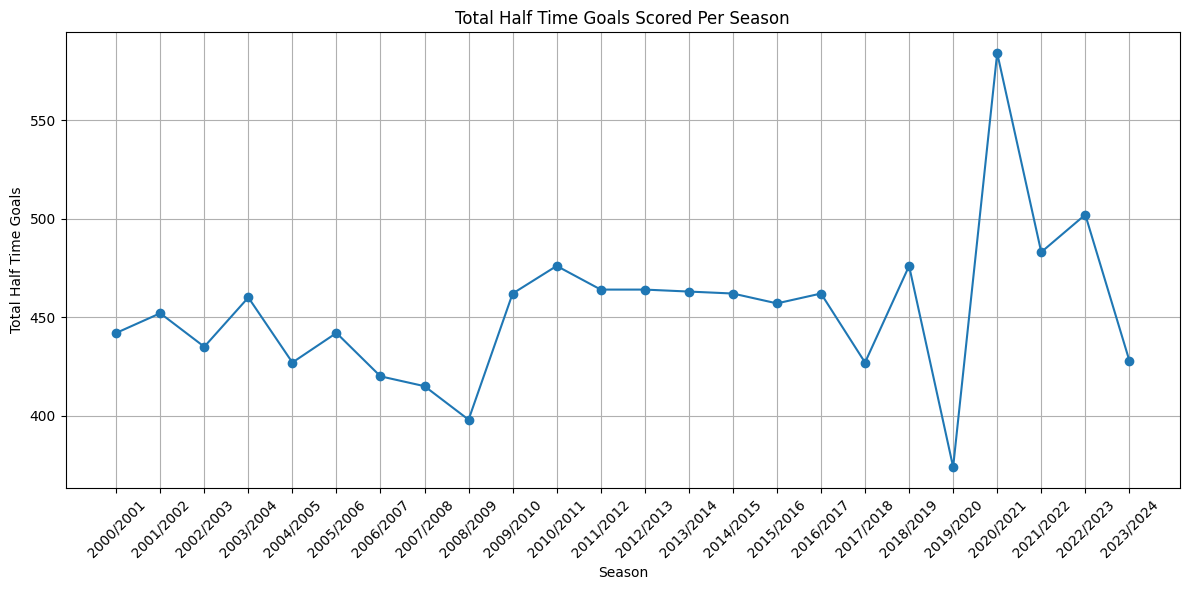

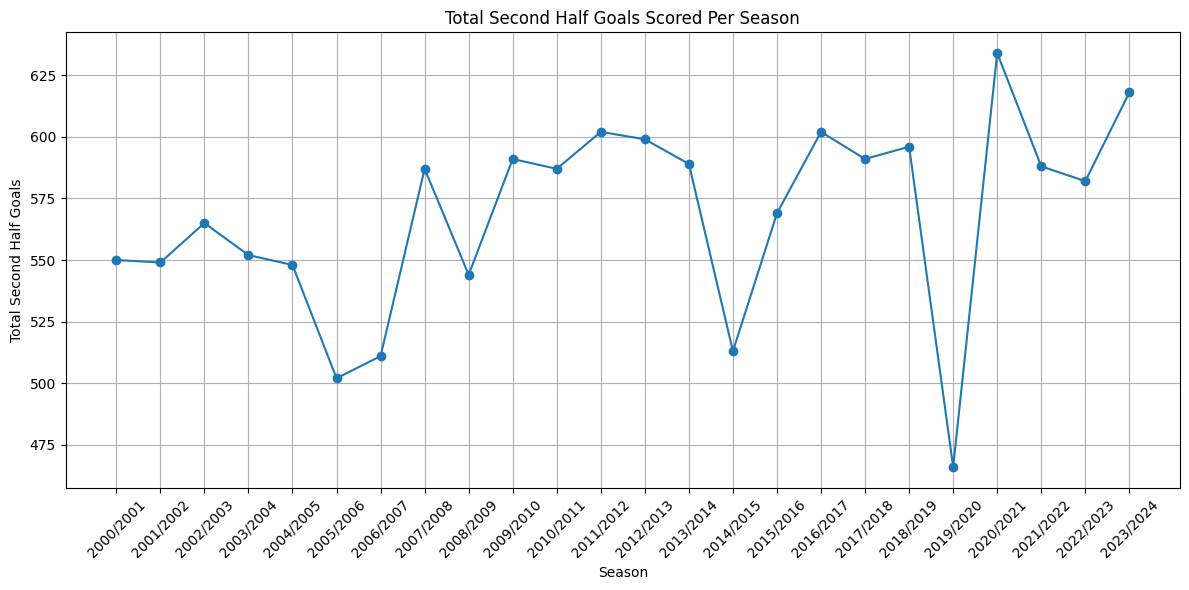

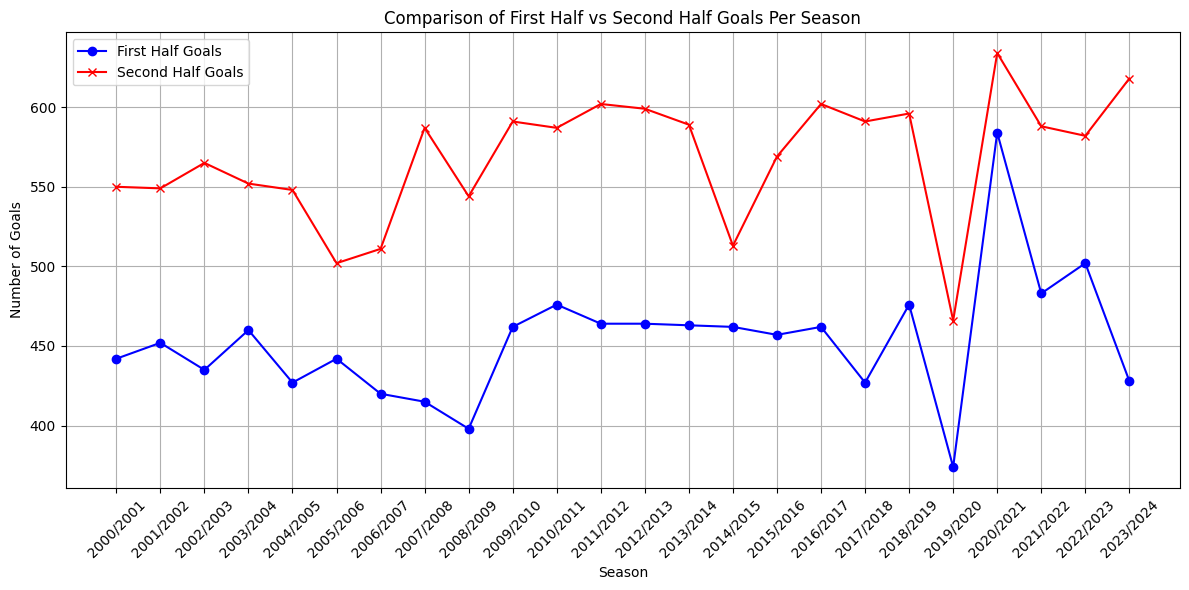

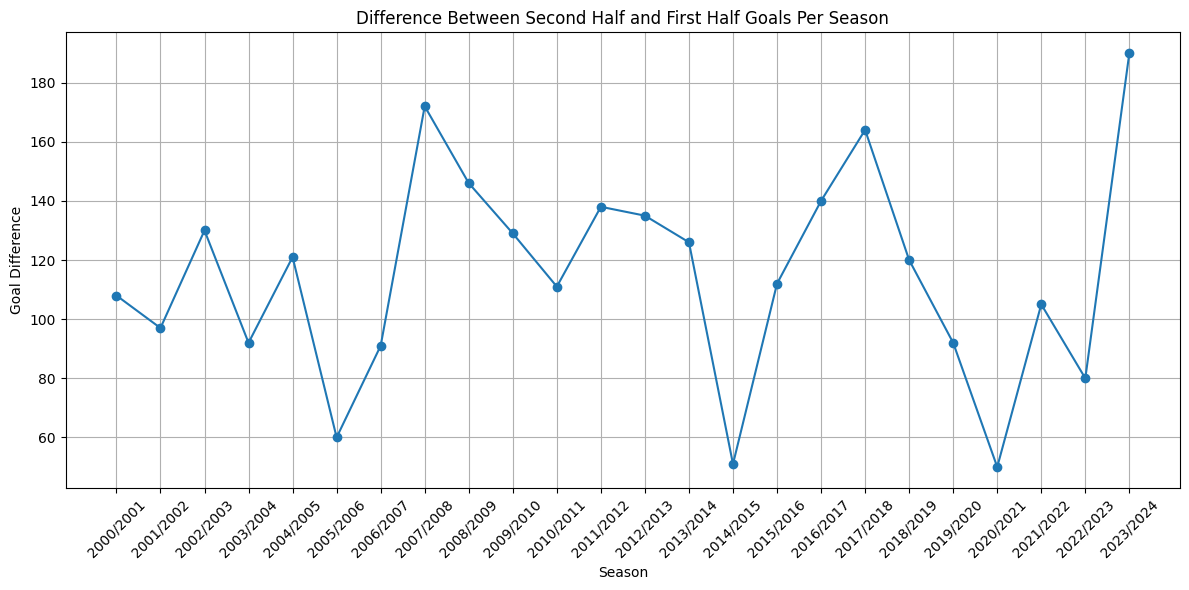

In [16]:
# Calculate second half goals before the groupby
concatenated_df['SecondHalf_Home_Goals'] = concatenated_df['FTHG'] - concatenated_df['HTHG']
concatenated_df['SecondHalf_Away_Goals'] = concatenated_df['FTAG'] - concatenated_df['HTAG']

# Calculate the booking points before grouping
concatenated_df['Home_BookingPoints'] = concatenated_df['HY'] * 10 + concatenated_df['HR'] * 25
concatenated_df['Away_BookingPoints'] = concatenated_df['AY'] * 10 + concatenated_df['AR'] * 25


# Group the data by season and sum the Goals committed
concatenated_df_grouped = concatenated_df.groupby('Season').agg(
    Total_Home_Goals=('FTHG', 'sum'),
    Total_Away_Goals=('FTAG', 'sum'),
    Total_HalfTime_Home_Goals=('HTHG', 'sum'),
    Total_HalfTime_Away_Goals=('HTAG', 'sum'),
    Total_SecondHalf_Home_Goals=('SecondHalf_Home_Goals', 'sum'),
    Total_SecondHalf_Away_Goals=('SecondHalf_Away_Goals', 'sum'),
    Home_BookingPoints=('Home_BookingPoints', 'sum'),
    Away_BookingPoints=('Away_BookingPoints', 'sum'),
    Total_Home_Fouls=('HF', 'sum'),
    Total_Away_Fouls=('AF', 'sum'),
)

# Calculate the total goals by adding the home and away goals
concatenated_df_grouped['Total_Goals'] = concatenated_df_grouped['Total_Home_Goals'] + concatenated_df_grouped['Total_Away_Goals']
concatenated_df_grouped['Total_HalfTime_Goals'] = concatenated_df_grouped['Total_HalfTime_Home_Goals'] + concatenated_df_grouped['Total_HalfTime_Away_Goals']
concatenated_df_grouped['Total_SecondHalf_Goals'] = concatenated_df_grouped['Total_SecondHalf_Home_Goals'] + concatenated_df_grouped['Total_SecondHalf_Away_Goals']

# Calculate the difference between first and second half goals
concatenated_df_grouped['HalfTime_SecondHalf_Goal_Diff'] = concatenated_df_grouped['Total_SecondHalf_Goals'] - concatenated_df_grouped['Total_HalfTime_Goals']

# Calculate home goals per away goals ratio
concatenated_df_grouped['Home_Away_Goal_Ratio'] = concatenated_df_grouped['Total_Home_Goals'] / concatenated_df_grouped['Total_Away_Goals']

# Calculate the goal difference between home and away teams
concatenated_df_grouped['Goal_Diff'] = concatenated_df_grouped['Total_Home_Goals'] - concatenated_df_grouped['Total_Away_Goals']

# Calculate the total booking points
concatenated_df_grouped['Total_BookingPoints'] = (concatenated_df_grouped['Home_BookingPoints'] + concatenated_df_grouped['Away_BookingPoints'])/10

# Calculate the total fouls
concatenated_df_grouped['Total_Fouls'] = concatenated_df_grouped['Total_Home_Fouls'] + concatenated_df_grouped['Total_Away_Fouls']


# Reset index to make 'Season' a column again if necessary
concatenated_df_grouped.reset_index(inplace=True)

# Display the result
print(concatenated_df_grouped)

# Plotting the goals committed per season
plt.figure(figsize=(12, 6))
plt.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['Total_Goals'], marker='o')
plt.title('Total Goals Scored Per Season')
plt.xlabel('Season')
plt.ylabel('Total Goals')
plt.xticks(rotation=45)  # Rotate season labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

# Plotting Goals vs Fouls per season
fig, ax1 = plt.subplots(figsize=(12, 6))
# Goal plot
color = 'tab:blue'
ax1.set_xlabel('Season')
ax1.set_ylabel('Total Goals', color=color)
ax1.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['Total_Goals'], marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
seasons = concatenated_df_grouped['Season']
ax1.set_xticks(range(len(seasons)))
ax1.set_xticklabels(seasons, rotation=45)
#
ax1.grid(True)
# Fouls plot
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Total Fouls', color=color)  # we already handled the x-label with ax1
ax2.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['Total_Fouls'], marker='x', color=color)
ax2.tick_params(axis='y', labelcolor=color)
#
fig.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.title('Total Goals vs Total Fouls Per Season')
plt.show()



# Plot home and away goals on the same graph
plt.figure(figsize=(12, 6))
plt.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['Total_Home_Goals'], marker='o', color='blue', label='Home Goals')
plt.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['Total_Away_Goals'], marker='x', color='red', label='Away Goals')
plt.title('Comparison of Home vs Away Goals Per Season')
plt.xlabel('Season')
plt.ylabel('Number of Goals')
plt.xticks(rotation=45)  # Rotate season labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

# Plotting the goal difference between home and away teams
plt.figure(figsize=(12, 6))
plt.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['Goal_Diff'], marker='o')
plt.title('Goal Difference Between Home and Away Teams Per Season')
plt.xlabel('Season')
plt.ylabel('Goal Difference')
plt.xticks(rotation=45)  # Rotate season labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

# Plotting the home vs away goal ratio
plt.figure(figsize=(12, 6))
plt.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['Home_Away_Goal_Ratio'], marker='o')
plt.title('Home vs Away Goal Ratio Per Season')
plt.xlabel('Season')
plt.ylabel('Home vs Away Goal Ratio')
plt.xticks(rotation=45)  # Rotate season labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

# Plotting only the half time goals
plt.figure(figsize=(12, 6))
plt.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['Total_HalfTime_Goals'], marker='o')
plt.title('Total Half Time Goals Scored Per Season')
plt.xlabel('Season')
plt.ylabel('Total Half Time Goals')
plt.xticks(rotation=45)  # Rotate season labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

# Plotting only the second half goals
plt.figure(figsize=(12, 6))
plt.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['Total_SecondHalf_Goals'], marker='o')
plt.title('Total Second Half Goals Scored Per Season')
plt.xlabel('Season')
plt.ylabel('Total Second Half Goals')
plt.xticks(rotation=45)  # Rotate season labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

# Plotting both half time and second half goals on the same graph
plt.figure(figsize=(12, 6))
plt.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['Total_HalfTime_Goals'], marker='o', color='blue', label='First Half Goals')
plt.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['Total_SecondHalf_Goals'], marker='x', color='red', label='Second Half Goals')
plt.title('Comparison of First Half vs Second Half Goals Per Season')
plt.xlabel('Season')
plt.ylabel('Number of Goals')
plt.xticks(rotation=45)  # Rotate season labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

# Plotting the difference between first and second half goals
plt.figure(figsize=(12, 6))
plt.plot(concatenated_df_grouped['Season'], concatenated_df_grouped['HalfTime_SecondHalf_Goal_Diff'], marker='o')
plt.title('Difference Between Second Half and First Half Goals Per Season')
plt.xlabel('Season')
plt.ylabel('Goal Difference')
plt.xticks(rotation=45)  # Rotate season labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

# Trying to export total goals per season to json for use in the web app
concatenated_df_grouped.to_json(os.path.join(data, 'total_goals_per_season.json'), orient='records', lines=True)

# Print json file
print(concatenated_df_grouped.to_json(orient='records', lines=True))



Which type of teams have benefitted the most?

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


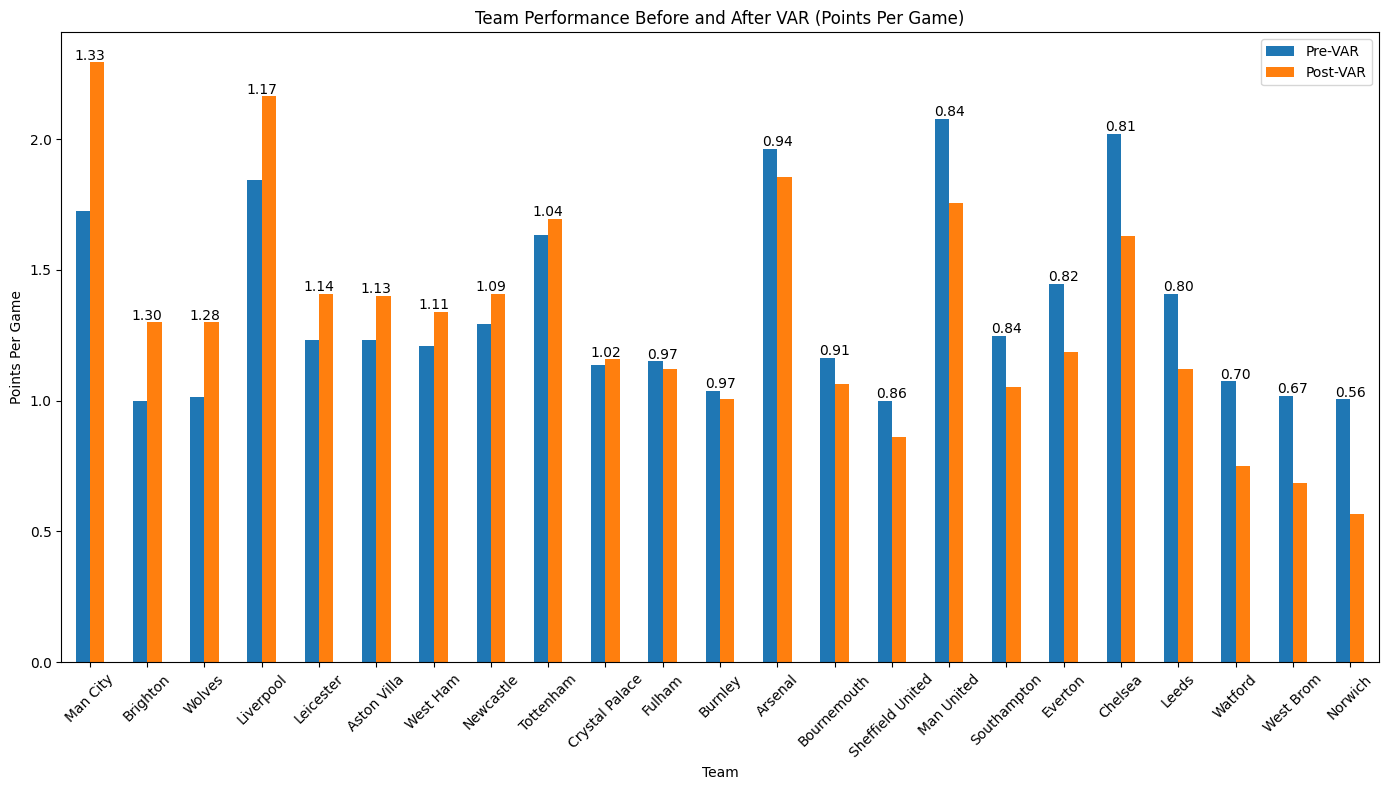

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming concatenated_df is already loaded

# Calculate points for each game
def calculate_points(row):
    if row['FTR'] == 'H':
        return pd.Series([3, 0], index=['home_points', 'away_points'])
    elif row['FTR'] == 'A':
        return pd.Series([0, 3], index=['home_points', 'away_points'])
    else:
        return pd.Series([1, 1], index=['home_points', 'away_points'])

concatenated_df[['home_points', 'away_points']] = concatenated_df.apply(calculate_points, axis=1)

# Define the VAR implementation date and separate the data
var_start_date = pd.Timestamp('2019-06-01')
pre_var_data = concatenated_df[concatenated_df['VAR'] == 0]
post_var_data = concatenated_df[concatenated_df['VAR'] == 1]

# Function to calculate total points and game counts
def aggregate_data(data):
    total_points = data.groupby('HomeTeam')['home_points'].sum().add(data.groupby('AwayTeam')['away_points'].sum(), fill_value=0)
    game_counts = data.groupby('HomeTeam').size().add(data.groupby('AwayTeam').size(), fill_value=0)
    points_per_game = total_points / game_counts
    result = pd.DataFrame({
        'Team': points_per_game.index,
        'Points_Per_Game': points_per_game.values,
        'Total_Points': total_points.values,
        'Games_Played': game_counts.values
    })
    return result

# Aggregate pre-VAR and post-VAR data
pre_var_stats = aggregate_data(pre_var_data)
post_var_stats = aggregate_data(post_var_data)

# Merge the data for plotting
team_performance = pd.merge(pre_var_stats, post_var_stats, on='Team', suffixes=('_Pre_VAR', '_Post_VAR'), how='outer')

# Fill NaN values with 0 if any due to the outer join
team_performance.fillna(0, inplace=True)

# Remove teams not present in both periods
team_performance = team_performance[(team_performance['Games_Played_Pre_VAR'] > 0) & (team_performance['Games_Played_Post_VAR'] > 0)]

# Calculate the ratio of post-VAR to pre-VAR points per game
team_performance['VAR_Impact_Ratio'] = team_performance['Points_Per_Game_Post_VAR'] / team_performance['Points_Per_Game_Pre_VAR']

# Sort by VAR impact ratio from highest to lowest
team_performance.sort_values('VAR_Impact_Ratio', ascending=False, inplace=True)

# Plotting the results
fig, ax = plt.subplots(figsize=(14, 8))
team_performance.plot(x='Team', y=['Points_Per_Game_Pre_VAR', 'Points_Per_Game_Post_VAR'], kind='bar', ax=ax)
plt.title('Team Performance Before and After VAR (Points Per Game)')
plt.xlabel('Team')
plt.ylabel('Points Per Game')
plt.xticks(rotation=45)
plt.legend(['Pre-VAR', 'Post-VAR'])

# Annotate the VAR impact ratio on top of the bars
for i, v in enumerate(team_performance['VAR_Impact_Ratio']):
    ax.text(i, max(team_performance.iloc[i][['Points_Per_Game_Pre_VAR', 'Points_Per_Game_Post_VAR']]) + 0.01, f"{v:.2f}", color='black', ha='center')

plt.tight_layout()
plt.show()


We will use the causal forest model to show the effects of VAR on the number of goals scored in a match.

In [18]:
import pandas as pd
from IPython.display import Image, display
from sklearn.model_selection import train_test_split
from econml.dml import CausalForestDML
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import LassoCV

# Preprocess the Date column
concatenated_df['Date'] = pd.to_datetime(concatenated_df['Date'])

# Create a new DataFrame with the new columns
date_info = pd.DataFrame({
    'Year': concatenated_df['Date'].dt.year,
    'Month': concatenated_df['Date'].dt.month,
    'Day': concatenated_df['Date'].dt.day,
    'TotalGoals': concatenated_df['FTAG'] + concatenated_df['FTHG']
})

# Concatenate the new DataFrame with the original DataFrame along the columns
concatenated_df = pd.concat([concatenated_df, date_info], axis=1)

treatment = 'VAR'
outcome = 'TotalGoals'
covariates = ["Year", 'Month', 'Day', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 
              'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']


# Drop missing data 
# Combine 'treatment' with 'outcome' and 'covariates' into one list
all_variables = [treatment] + [outcome] + covariates
concatenated_df = concatenated_df.dropna(axis=0, subset=all_variables)

# Split data into train and test sets 
train, test = train_test_split(concatenated_df, test_size=0.2)

# set variables for causal forest Y=outcome, T=treatment, X=covariates, W=effect_modifiers 
Y = train[outcome]
T = train[treatment]
X = train[covariates]
W = None
X_test = test[covariates]

# Update the model parameters for causal forest
causal_forest = CausalForestDML(
    criterion='het',
    n_estimators=10000,
    min_samples_leaf=10,
    max_depth=None,
    max_samples=0.5,
    discrete_treatment=False,
    honest=True,
    inference=True,
    cv=10,
    model_t=LassoCV(),
    model_y=LassoCV()   
)


                      
# fit train data to causal forest model 
causal_forest.fit(Y, T, X=X, W=W)
print("The CATE is estimated to be:", causal_forest.const_marginal_ate(X_test))
print("saving the CATE variable...")
CATE = causal_forest.const_marginal_ate(X_test)
print("Saving the CATE variable to a file...")
open(CATE_values_path, 'a').write(f"{CATE}\n")
print("CATE variable saved to file.")







The CATE is estimated to be: 0.14620094142757978
saving the CATE variable...
Saving the CATE variable to a file...
CATE variable saved to file.


I added 20 CATEs to a list, and took the mean of these CATEs to get the average CATE.

In [19]:
import os
import numpy as np
import scipy.stats as stats

count = 0

# Read the data from the file
if os.path.isfile(CATE_values_path):  # Check if the file actually exists
    with open(CATE_values_path, 'r') as file:
        numbers = []
        for line in file:
            try:
                num = float(line.strip())
                numbers.append(num)
                count += 1
            except ValueError:
                continue  # Skip lines that cannot be converted to float

    if numbers:
        # Convert list to numpy array for statistical calculations
        numbers = np.array(numbers)
        
        # Calculate various statistics
        mean_value = np.mean(numbers)
        std_dev = np.std(numbers)
        conf_interval = stats.norm.interval(0.95, loc=mean_value, scale=std_dev / np.sqrt(len(numbers)))
        min_value = np.min(numbers)
        max_value = np.max(numbers)
        percentiles = np.percentile(numbers, [25, 50, 75])
        iqr = stats.iqr(numbers)
        skewness = stats.skew(numbers)
        kurtosis = stats.kurtosis(numbers)
                
        # Print the calculated statistics
        print(f"Number of valid data points: {count}")
        print(f"Mean value: {mean_value:.4f}")
        print(f"Standard Deviation: {std_dev:.4f}")
        print(f"95% Confidence Interval: {conf_interval}")
        print(f"Min CATE: {min_value}, Max CATE: {max_value}")
        print(f"Percentiles (25%, 50%, 75%): {percentiles}")
        print(f"IQR: {iqr}")
        print(f"Skewness: {skewness}")
        print(f"Kurtosis: {kurtosis}")
    else:
        print("No valid data found in file.")
else:
    print(f"File not found: {CATE_values_path}")

Number of valid data points: 44
Mean value: 0.1835
Standard Deviation: 0.0435
95% Confidence Interval: (0.17068829349801704, 0.1963927442376374)
Min CATE: 0.10071708016917981, Max CATE: 0.28927828538016265
Percentiles (25%, 50%, 75%): [0.14478152 0.18448503 0.21688457]
IQR: 0.07210304918322186
Skewness: 0.1538901791853731
Kurtosis: -0.6240742200550184
